<a href="https://colab.research.google.com/github/Sara-Esm/Machine-Learning-Iris-Dataset/blob/main/machine_learning_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

In [118]:
class Model(nn.Module):
    def __init__(self, in_features, H1, H2, out_features):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, H1)
        self.fc2 = nn.Linear(H1, H2)
        self.out = nn.Linear(H2, out_features)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.out(X)
        return X

In [119]:
#pick a manual seed for randomization
torch.manual_seed(41)

In [120]:
#Creat an instance of modwel
model = Model(in_features=4, H1=8, H2=8, out_features=3)
print(model)

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)


In [121]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
# Load the data (Iris dataset)
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [123]:
# Drop unnecessary columns and convert the label column to numeric values
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [124]:
# Set X and y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [125]:
# Convert X and y to numpy arrays
X = X.values
y = y.values

In [126]:
from sklearn.model_selection import train_test_split
import torch.optim as optim

In [127]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [128]:
print(y_train.dtype)

int64


In [129]:
# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [130]:
# Set criterion and optimizer
criterion = torch.nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [131]:
# Train the model
epochs = 100
losses = []
for i in range(epochs):
    # Forward pass
    y_pred = model.forward(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Append loss to list
    losses.append(loss.detach().numpy())

    # Print epoch and loss every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i}, Loss: {loss}')

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, Loss: 1.1318365335464478
Epoch: 10, Loss: 0.9658561944961548
Epoch: 20, Loss: 0.678993821144104
Epoch: 30, Loss: 0.4004894196987152
Epoch: 40, Loss: 0.2250950187444687
Epoch: 50, Loss: 0.12207333743572235
Epoch: 60, Loss: 0.07481686770915985
Epoch: 70, Loss: 0.05451279506087303
Epoch: 80, Loss: 0.044374920427799225
Epoch: 90, Loss: 0.03837944194674492


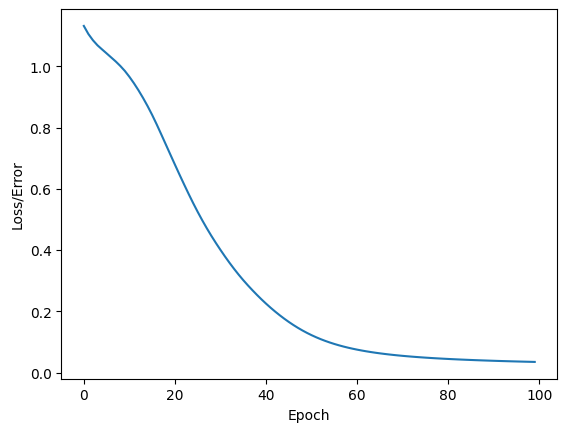

In [132]:
# Plot the losses
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss/Error')
plt.show()

In [ ]:
# Define the model architecture
model = nn.Sequential(
    nn.Linear(4, 16),  # Input layer (4 input features, 16 neurons)
    nn.ReLU(),         # Activation function
    nn.Linear(16, 8),  # Hidden layer (16 neurons, 8 neurons)
    nn.ReLU(),         # Activation function
    nn.Linear(8, 3)    # Output layer (8 neurons, 3 output classes)
)